# 1. Numpy

In [82]:
import numpy as np
x = np.random.randint(1,21, size=15) #random integer vector of size 15 ranging 1-20.
print("Original array: \n", x)
reshapeArr=x.reshape(3,5)#Reshape array to 3 by 5
print("Array after reshaping:\n", reshapeArr)
print("Array Shape: \n", reshapeArr.shape)#Array shape
#maxNum=np.amax(reshapeArr,axis=1)
#print("Array maximum numbers: \n", maxNum)#Maximum numbers in array
new_a = np.where(reshapeArr==reshapeArr.max(axis=1)[:,None],0,reshapeArr) #Replacing max in each row by 0
print("Array after replacing maximum value by 0: \n", new_a)


Original array: 
 [14  4  2 20  8  2 12 20 15  6  8 18 19 14  6]
Array after reshaping:
 [[14  4  2 20  8]
 [ 2 12 20 15  6]
 [ 8 18 19 14  6]]
Array Shape: 
 (3, 5)
Array after replacing maximum value by 0: 
 [[14  4  2  0  8]
 [ 2 12  0 15  6]
 [ 8 18  0 14  6]]


# 2.Pandas

In [55]:
import pandas as pd

data = pd.read_csv("data.csv") #read data file
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [52]:
data.describe() #statistical description about the data

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [53]:
data.isnull().any() #To check if the data has null values

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [56]:
data.fillna(data.mean(), inplace=True) #Replace the null values with the mean
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [57]:
data.agg({'Duration':['min','max','count','mean'],'Pulse':['min','max','count','mean']})#min, max, count, mean to aggregate data

,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


In [58]:
data.loc[(data['Calories']>500)&(data['Calories']<1000)]#Filter data for calorie values between 500 and 1000

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [59]:
data.loc[(data['Calories']>500)&(data['Pulse']<100)]#Filter data for calorie values 500 and pulse values 1000

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [60]:
df_modified = data[['Duration','Pulse','Calories']]#dataframe to include all column values except for Maxpulse
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [61]:
del data['Maxpulse'] #delete Maxpulse value column data
data.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [62]:
data.dtypes #datatype of all columns

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [63]:
data['Calories'] = data['Calories'].astype(np.int64) ]converting calories datatype to int using astype
data.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

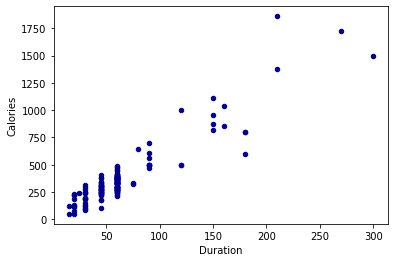

In [66]:
data.plot.scatter(x='Duration',y='Calories',c='DarkBlue') #scatter plot created for Duration and Calories with color blue

# 3.Matplotlib

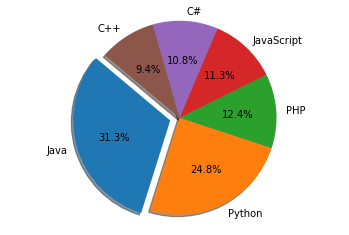

In [65]:
import matplotlib.pyplot as plt #importing matplotlib.pyplot
languages = 'Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++' # Data to plot
popuratity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# explode 1st slice
explode = (0.1, 0, 0, 0,0,0)  
# Plot
plt.pie(popuratity, explode=explode, labels=languages, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
